In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [126]:
from copy import deepcopy
import pandas as pd
import numpy as np
from more_itertools import flatten

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import community
import networkx as nx

In [223]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [323]:
alliance_net_df = pd.read_pickle('pickle/alliance_net_df.pkl')
mid_net_df = pd.read_pickle('pickle/mid_net_df.pkl')
trade_net_df = pd.read_pickle('pickle/trade_net_df.pkl')

In [324]:
len(alliance_net_df)

133486

In [325]:
len(mid_net_df)

6308

In [131]:
alliance_net_df.head()

,c_code_1,state_name_1,c_code_2,state_name_2,pre_1816_alliance,in_effect_1231_2012,defense_treaty,neutrality_treaty,nonaggression_treaty,entente_treaty,year,alliance_date_start,alliance_date_end
14772,91,Honduras,150,Paraguay,0,0,1,0,0.0,1.0,1946,1945-03-06,1947-09-02
14773,651,Egypt,200,United Kingdom,0,0,0,0,0.0,1.0,1946,1937-05-26,1951-10-08
14774,91,Honduras,94,Costa Rica,0,0,1,0,0.0,1.0,1946,1945-03-06,1947-09-02
14775,93,Nicaragua,145,Bolivia,0,0,1,0,0.0,1.0,1946,1945-03-06,1947-09-02
14776,365,Russia,712,Mongolia,0,0,1,0,0.0,0.0,1946,1936-03-12,1991-12-25


In [132]:
mid_net_df.head()

,dispute_id,c_code_1,state_name_abb_a,c_code_2,state_name_abb_b,year,outcome,settlement_type,total_fatality_bin,num_with,...,state_fatality_bin,hostility_level,origin_participant,war,year_num,cumulative_duration,ongoing_2010,date_start,date_end,initiator
3544,1792,220,FRN,800,THI,1946,Stalemate,Negotiated,101-250,1,...,1-25,4,1,0,1,251,0,1946-04-01,1946-12-07,1.0
3545,1792,800,THI,220,FRN,1946,Stalemate,Negotiated,101-250,1,...,101-250,4,1,0,1,251,0,1946-04-01,1946-12-07,0.0
3546,2704,710,CHN,365,RUS,1946,Unclear,Unclear,None Value,1,...,None Value,1,1,0,2,211,0,1945-10-06,1946-05-03,0.0
3547,3192,200,UKG,345,YUG,1946,Stalemate,None Value,None Value,1,...,None Value,4,1,0,1,1,0,1946-10-05,1946-10-05,1.0
3548,3192,345,YUG,200,UKG,1946,Stalemate,None Value,None Value,1,...,None Value,4,1,0,1,1,0,1946-10-05,1946-10-05,0.0


In [326]:
trade_net_df.head()

,c_code_1,c_code_2,money_flow_1,money_flow_2,state_name_1,state_name_2,year
176748,230,355,0.0,0.0,Spain,Bulgaria,1946
176749,645,678,0.0,0.0,Iraq,Yemen Arab Republic,1946
176750,70,920,0.0,0.0,Mexico,New Zealand,1946
176751,160,385,5800000.0,12800000.0,Argentina,Norway,1946
176752,2,145,59000000.0,37070000.0,United States of America,Bolivia,1946


In [133]:
one_df = pd.merge(alliance_net_df, mid_net_df, how = 'inner', on = ['c_code_1', 'c_code_2', 'year'])

In [327]:
len(one_df)

2210

In [328]:
two_df = pd.merge(one_df, trade_net_df, how = 'inner', on = ['c_code_1', 'c_code_2', 'year'])

In [462]:
two_df['avg_money_flow'] = (two_df['money_flow_1'] + two_df['money_flow_2'])/2

In [478]:
two_df.rename({'state_name_1_x': 'state_name_1', 'state_name_2_x': 'state_name_2'}, axis = 1, inplace = True)
two_df.drop(['state_name_1_y', 'state_name_2_y'], axis = 1, inplace = True)

In [479]:
len(two_df)

2166

In [480]:
two_df.head()

,c_code_1,state_name_1,c_code_2,state_name_2,pre_1816_alliance,in_effect_1231_2012,defense_treaty,neutrality_treaty,nonaggression_treaty,entente_treaty,year,alliance_date_start,alliance_date_end,dispute_id,state_name_abb_a,state_name_abb_b,outcome,settlement_type,total_fatality_bin,num_with,num_against,revision_sought,revision_type,state_fatality_bin,hostility_level,origin_participant,war,year_num,cumulative_duration,ongoing_2010,date_start,date_end,initiator,money_flow_1,money_flow_2,avg_money_flow
0,200,United Kingdom,365,Russia,0,0,1,0,0.0,0.0,1946,1941-07-12,1955-05-07,603,UKG,RUS,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,1,0,1,1,0,1946-08-03,1946-08-03,1.0,109300000.0,28500000.0,68900000.0
1,200,United Kingdom,365,Russia,0,0,1,0,0.0,1.0,1946,1942-01-29,1946-03-19,603,UKG,RUS,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,1,0,1,1,0,1946-08-03,1946-08-03,1.0,109300000.0,28500000.0,68900000.0
2,200,United Kingdom,630,Iran,0,0,1,0,0.0,1.0,1946,1942-01-29,1946-03-19,603,UKG,IRN,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,1,0,1,2,0,1946-08-02,1946-08-03,1.0,145500000.0,35800000.0,90650000.0
3,365,Russia,200,United Kingdom,0,0,1,0,0.0,1.0,1946,1942-01-29,1946-03-19,603,RUS,UKG,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,0,0,1,1,0,1946-08-03,1946-08-03,0.0,28500000.0,109300000.0,68900000.0
4,365,Russia,200,United Kingdom,0,0,1,0,0.0,0.0,1946,1941-07-12,1955-05-07,603,RUS,UKG,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,0,0,1,1,0,1946-08-03,1946-08-03,0.0,28500000.0,109300000.0,68900000.0


In [506]:
combo_df = deepcopy(two_df[['state_name_1', 'state_name_2', 'year', 'date_start', 'avg_money_flow', 'cumulative_duration']])

In [507]:
aggregations = {
    'date_start': 'count',
    'avg_money_flow': 'mean',
    'cumulative_duration': 'sum'
    }

group_combo_df = combo_df.groupby(['year', 'state_name_1', 'state_name_2']).agg(aggregations).reset_index()

In [508]:
group_combo_df.head()

,year,state_name_1,state_name_2,date_start,avg_money_flow,cumulative_duration
0,1946,China,Russia,1,728150000.0,211
1,1946,Iran,Russia,1,1700000.0,174
2,1946,Iran,United Kingdom,1,90650000.0,2
3,1946,Russia,China,1,728150000.0,211
4,1946,Russia,Iran,1,1700000.0,174


In [509]:
aggregations = {
    'date_start': 'sum',
    'year': 'count',
    'avg_money_flow': 'mean',
    'cumulative_duration': 'sum'
    }

group_combo_df = group_combo_df.groupby(['state_name_1', 'state_name_2']).agg(aggregations).reset_index()

In [510]:
for i, combo in enumerate(group_combo_df['state_name_1']):
    group_combo_df.loc[i, 'treaties_per_year'] = group_combo_df['date_start'][i]/group_combo_df['year'][i]
group_combo_df.drop(['date_start'], axis = 1, inplace = True)

In [511]:
group_combo_df.head()

,state_name_1,state_name_2,year,avg_money_flow,cumulative_duration,treaties_per_year
0,Afghanistan,Iran,3,5.280000e+06,220,1.000000
1,Afghanistan,Pakistan,8,5.054462e+08,3626,1.125000
2,Albania,Yugoslavia,1,0.000000e+00,269,1.000000
3,Algeria,Mauritania,1,1.920000e+06,1,1.000000
4,Algeria,Morocco,6,5.329167e+06,399,1.833333


In [512]:
distinct_combo_df = deepcopy(one_df[['state_name_1', 'state_name_2']])

duplicate_list = ['state_name_1', 'state_name_2']

distinct_combo_df.drop_duplicates(subset = duplicate_list, keep = 'first', inplace = True)

In [513]:
distinct_combo_df = distinct_combo_df.reset_index()
distinct_combo_df.drop(['index'], axis = 1, inplace = True)

In [514]:
all_combos = []
for i, row in enumerate(distinct_combo_df['state_name_1']):
    all_combos.append((distinct_combo_df['state_name_1'][i], distinct_combo_df['state_name_2'][i]))

In [515]:
len(all_combos)

388

In [516]:
distinct_countries = []
for i in flatten(all_combos):
    distinct_countries.append(i)
distinct_countries = sorted(list(set(distinct_countries)))

In [517]:
len(distinct_countries)

132

In [518]:
np.array(distinct_countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua & Barbuda',
       'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechoslovakia', 'Democratic Republic of the Congo', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'German Democratic Republic',
       'German Federal Republic', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Iran', 'Iraq',
       'Israel', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kenya', 'Kuwa

In [519]:
combo_deg_1 = list(filter(lambda country: 'Spain' in country, all_combos))

In [520]:
import json

In [521]:
len(country_deg_1)

38

In [522]:
node_deg_1 = []
for a, b in combo_deg_1:
    node_deg_1.append(a)
    node_deg_1.append(b)
node_deg_1 = sorted(list(set(node_deg_1)))

In [523]:
len(node_deg_1)

4

In [524]:
full_network = []
for a, b in all_combos:
    for country in node_deg_1:
        if country == a:
            full_network.append((a, b))
        elif country == b:
            full_network.append((a, b))
full_network = sorted(full_network)

In [525]:
len(full_network)

54

In [535]:
full_network[0][0]

'Canada'

In [ ]:
# new dataframe filtering the full network on the grouped

full_network_df = pd.DataFrame()
for combo in group_combo_df['state_name_1']:
    for connection in full_network:
        if full_network_df[]

full_network[0][0]

In [526]:
from collections import Counter

In [527]:
full_network_counter = Counter(full_network)

In [528]:
all_nodes = []
for country_a, country_b in full_network:
    all_nodes.append(country_a)
    all_nodes.append(country_b)
all_nodes = sorted(list(set(all_nodes)))

In [529]:
len(all_nodes)

19

In [530]:
full_network_counter

Counter({('Canada', 'Denmark'): 1,
         ('Canada', 'France'): 2,
         ('Canada', 'Haiti'): 1,
         ('Canada', 'Portugal'): 1,
         ('Canada', 'Russia'): 1,
         ('Canada', 'Spain'): 2,
         ('Canada', 'United States of America'): 1,
         ('China', 'United Kingdom'): 1,
         ('Congo', 'France'): 1,
         ('Denmark', 'Canada'): 1,
         ('Denmark', 'United Kingdom'): 1,
         ('Egypt', 'United Kingdom'): 1,
         ('France', 'Canada'): 2,
         ('France', 'Congo'): 1,
         ('France', 'Gabon'): 1,
         ('France', 'Libya'): 1,
         ('France', 'Morocco'): 1,
         ('France', 'Russia'): 1,
         ('France', 'Spain'): 2,
         ('Gabon', 'France'): 1,
         ('Haiti', 'Canada'): 1,
         ('Iceland', 'United Kingdom'): 1,
         ('Iran', 'United Kingdom'): 1,
         ('Iraq', 'United Kingdom'): 1,
         ('Israel', 'United Kingdom'): 1,
         ('Libya', 'France'): 1,
         ('Morocco', 'France'): 1,
         ('Portu

In [531]:
graph_file = open("./d3/network.json", 'a+')

json_dic = {}
json_dic['nodes'] = {}
json_dic['links'] = {}
start_line = '{\n  "nodes": [\n'

graph_file.write(start_line)
for i, node in enumerate(all_nodes):
    if node == all_nodes[-1]:
        add_line = '    {"country": "' + node + '", "size": 12}\n'
        graph_file.write(add_line)
    else:
        add_line = '    {"country": "' + node + '", "size": 12},\n'
        graph_file.write(add_line)
middle_line = start_line = '  ],\n  "links": [\n'
graph_file.write(start_line)
node_count = 0
for node_1, node_2 in full_network:
    node_count+=1
    bond = full_network_counter[(node_1, node_2)]
    if node_count == len(full_network):
        add_line = '    {"source": ' + str(all_nodes.index(node_1)) + ', "target": ' + str(all_nodes.index(node_2)) + ', "bond": ' + str(bond) + '}\n'
        graph_file.write(add_line)
    else:
        add_line = '    {"source": ' + str(all_nodes.index(node_1)) + ', "target": ' + str(all_nodes.index(node_2)) + ', "bond": ' + str(bond) + '},\n'
        graph_file.write(add_line)
end_line = '\n  ]\n}'
graph_file.write(end_line)

6

In [307]:
with open('d3/network.json', 'w') as outfile:
    json.dump(network_list, outfile)

In [288]:
country_graph = nx.Graph()

In [292]:
for country_a, country_b in full_network_list:
    country_a_label = country_a.replace(' ', '\n')
    country_b_label = country_b.replace(' ', '\n')
    treaties_per_year = 1000 * (int(group_combo_df[(group_combo_df['state_name_1'] == country_a) & (group_combo_df['state_name_2'] == country_b)]['treaties_per_year'].values[0]))
    country_graph.add_edge(country_a_label, country_b_label, weight = treaties_per_year)

In [293]:
# if numfind.match(line): # this line is distances
#     dist=line.split()
#     for d in dist:
#         G.add_edge(city,cities[i],weight=int(d))
#         i=i+1
# else: # this line is a city, position, population
#     i=1
#     (city,coordpop)=line.split("[")
#     cities.insert(0,city)
#     (coord,pop)=coordpop.split("]")
#     (y,x)=coord.split(",")

#     G.add_node(city)
#     # assign position - flip x axis for matplotlib, shift origin
#     G.position[city]=(-int(x)+7500,int(y)-3000)
#     G.population[city]=float(pop)/1000.0

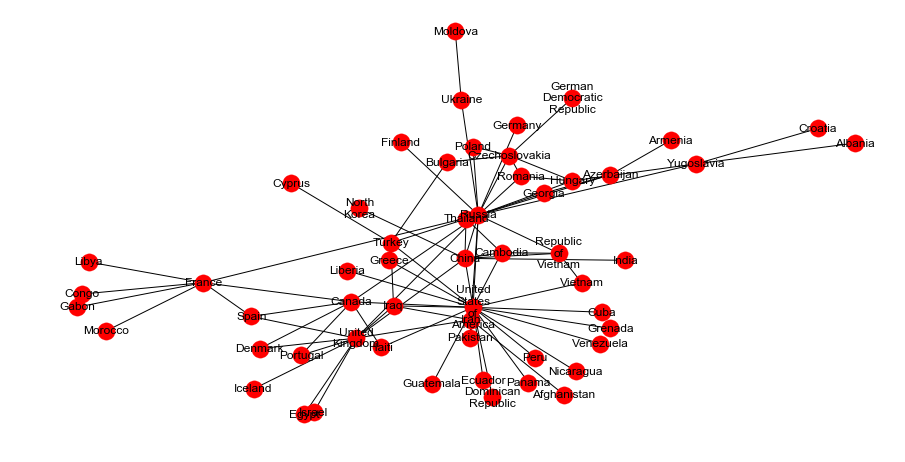

In [297]:
filterwarnings('ignore')

plt.style.use('seaborn')
plt.figure(figsize = (12, 6))

positions = nx.spring_layout(country_graph)
network = nx.draw(country_graph, pos = positions)
labels =  nx.draw_networkx_labels(country_graph, pos = positions)
nx.write_gexf(country_graph, "test.gexf")

['Ravenna, OH', 'Reading, PA', 'Red Bluff, CA', 'Regina, SK', 'Reno, NV', 'Rhinelander, WI', 'Richfield, UT', 'Richmond, IN', 'Richmond, VA', 'Roanoke, VA', 'Rochester, MN', 'Rochester, NY', 'Rockford, IL', 'Rock Springs, WY', 'Rocky Mount, NC', 'Roswell, NM', 'Rutland, VT', 'Sacramento, CA', 'Saginaw, MI', 'Saint Augustine, FL', 'Saint Cloud, MN', 'Saint Johnsbury, VT', 'Saint Joseph, MI', 'Saint Joseph, MO', 'Saint Louis, MO', 'Saint Paul, MN', 'Salem, OR', 'Salida, CO', 'Salina, KS', 'Salinas, CA', 'Salisbury, MD', 'Salt Lake City, UT', 'San Angelo, TX', 'San Antonio, TX', 'San Bernardino, CA', 'San Diego, CA', 'Sandusky, OH', 'San Francisco, CA', 'San Jose, CA', 'Santa Ana, CA', 'Santa Barbara, CA', 'Santa Fe, NM', 'Santa Rosa, CA', 'Sarasota, FL', 'Sault Sainte Marie, MI', 'Savannah, GA', 'Schenectady, NY', 'Scottsbluff, NE', 'Scranton, PA', 'Seattle, WA', 'Sedalia, MO', 'Selma, AL', 'Seminole, OK', 'Sheridan, WY', 'Sherman, TX', 'Shreveport, LA', 'Sioux City, IA', 'Sioux Falls, S

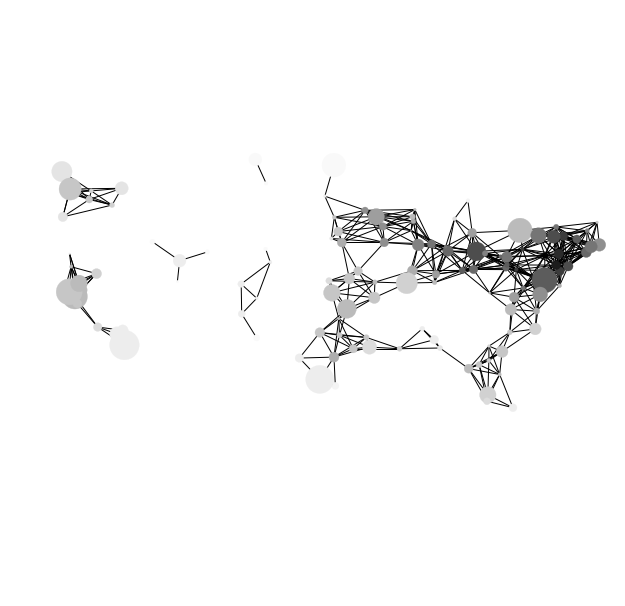

In [218]:
#!/usr/bin/env python
"""
An example using networkx.Graph().

miles_graph() returns an undirected graph over the 128 US cities from
the datafile miles_dat.txt. The cities each have location and population
data.  The edges are labeled with the distance betwen the two cities.

This example is described in Section 1.1 in Knuth's book [1,2].

References.
-----------

[1] Donald E. Knuth,
    "The Stanford GraphBase: A Platform for Combinatorial Computing",
    ACM Press, New York, 1993.
[2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html


"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2004-2015 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx


def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)
    import gzip
    fh = gzip.open('/Users/charlieyaris/Downloads/knuth_miles.txt.gz','r')

    G=nx.Graph()
    G.position={}
    G.population={}

    cities=[]
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"): # skip comments
            continue

        numfind=re.compile("^\d+")

        if numfind.match(line): # this line is distances
            dist=line.split()
            for d in dist:
                G.add_edge(city,cities[i],weight=int(d))
                i=i+1
        else: # this line is a city, position, population
            i=1
            (city,coordpop)=line.split("[")
            cities.insert(0,city)
            (coord,pop)=coordpop.split("]")
            (y,x)=coord.split(",")

            G.add_node(city)
            # assign position - flip x axis for matplotlib, shift origin
            G.position[city]=(-int(x)+7500,int(y)-3000)
            G.population[city]=float(pop)/1000.0
    print(cities)
    return G

if __name__ == '__main__':
    import networkx as nx
    import re
    import sys

    G=miles_graph()

    print("Loaded miles_dat.txt containing 128 cities.")
    print("digraph has %d nodes with %d edges"\
          %(nx.number_of_nodes(G),nx.number_of_edges(G)))


    # make new graph of cites, edge if less then 300 miles between them
    H=nx.Graph()
    for v in G:
        H.add_node(v)
    for (u,v,d) in G.edges(data=True):
        if d['weight'] < 300:
            H.add_edge(u,v)

    # draw with matplotlib/pylab

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8,8))
        # with nodes colored by degree sized by population
        node_color=[float(H.degree(v)) for v in H]
        nx.draw(H,G.position,
             node_size=[G.population[v] for v in H],
             node_color=node_color,
             with_labels=False)

        # scale the axes equally
        plt.xlim(-5000,500)
        plt.ylim(-2000,3500)

        plt.savefig("knuth_miles.png")
    except:
        pass

Loaded miles_dat.txt containing 128 cities.
digraph has 128 nodes with 8128 edges


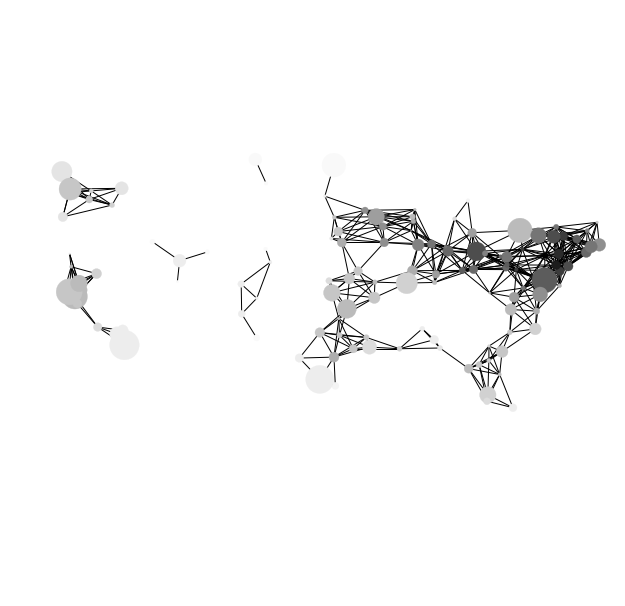

In [214]:
#!/usr/bin/env python
"""
An example using networkx.Graph().

miles_graph() returns an undirected graph over the 128 US cities from
the datafile miles_dat.txt. The cities each have location and population
data.  The edges are labeled with the distance betwen the two cities.

This example is described in Section 1.1 in Knuth's book [1,2].

References.
-----------

[1] Donald E. Knuth,
    "The Stanford GraphBase: A Platform for Combinatorial Computing",
    ACM Press, New York, 1993.
[2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html


"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2004-2015 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx


def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)
    import gzip
    fh = gzip.open('/Users/charlieyaris/Downloads/knuth_miles.txt.gz','r')

    G=nx.Graph()
    G.position={}
    G.population={}

    cities=[]
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"): # skip comments
            continue

        numfind=re.compile("^\d+")

        if numfind.match(line): # this line is distances
            dist=line.split()
            for d in dist:
                G.add_edge(city,cities[i],weight=int(d))
                i=i+1
        else: # this line is a city, position, population
            i=1
            (city,coordpop)=line.split("[")
            cities.insert(0,city)
            (coord,pop)=coordpop.split("]")
            (y,x)=coord.split(",")

            G.add_node(city)
            # assign position - flip x axis for matplotlib, shift origin
            G.position[city]=(-int(x)+7500,int(y)-3000)
            G.population[city]=float(pop)/1000.0
    return G

if __name__ == '__main__':
    import networkx as nx
    import re
    import sys

    G=miles_graph()

    print("Loaded miles_dat.txt containing 128 cities.")
    print("digraph has %d nodes with %d edges"\
          %(nx.number_of_nodes(G),nx.number_of_edges(G)))


    # make new graph of cites, edge if less then 300 miles between them
    H=nx.Graph()
    for v in G:
        H.add_node(v)
    for (u,v,d) in G.edges(data=True):
        if d['weight'] < 300:
            H.add_edge(u,v)

    # draw with matplotlib/pylab

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8,8))
        # with nodes colored by degree sized by population
        node_color=[float(H.degree(v)) for v in H]
        nx.draw(H,G.position,
             node_size=[G.population[v] for v in H],
             node_color=node_color,
             with_labels=False)

        # scale the axes equally
        plt.xlim(-5000,500)
        plt.ylim(-2000,3500)

        plt.savefig("knuth_miles.png")
    except:
        pass

In [301]:
nx.number_of_nodes(country_graph)

56

In [302]:
print(np.asarray(nx.degree(country_graph)))

[['United\nKingdom' '10']
 ['Russia' '19']
 ['Iran' '6']
 ['China' '8']
 ['France' '7']
 ['Yugoslavia' '4']
 ['Albania' '1']
 ['Hungary' '4']
 ['Egypt' '1']
 ['Ecuador' '1']
 ['United\nStates\nof\nAmerica' '21']
 ['Finland' '1']
 ['Nicaragua' '1']
 ['Peru' '1']
 ['Poland' '2']
 ['Israel' '1']
 ['Iceland' '1']
 ['Iraq' '4']
 ['Turkey' '6']
 ['Morocco' '1']
 ['Guatemala' '1']
 ['Cuba' '1']
 ['Dominican\nRepublic' '1']
 ['Denmark' '2']
 ['Thailand' '3']
 ['India' '1']
 ['Vietnam' '2']
 ['Republic\nof\nVietnam' '4']
 ['Cambodia' '4']
 ['Haiti' '2']
 ['Greece' '2']
 ['Gabon' '1']
 ['Cyprus' '1']
 ['Portugal' '2']
 ['Czechoslovakia' '6']
 ['German\nDemocratic\nRepublic' '1']
 ['Bulgaria' '2']
 ['Romania' '3']
 ['Congo' '1']
 ['Libya' '1']
 ['Canada' '7']
 ['Grenada' '1']
 ['Spain' '3']
 ['Panama' '1']
 ['Azerbaijan' '3']
 ['Armenia' '1']
 ['Georgia' '2']
 ['North\nKorea' '1']
 ['Croatia' '1']
 ['Ukraine' '2']
 ['Liberia' '1']
 ['Germany' '1']
 ['Venezuela' '1']
 ['Pakistan' '2']
 ['Moldova' 

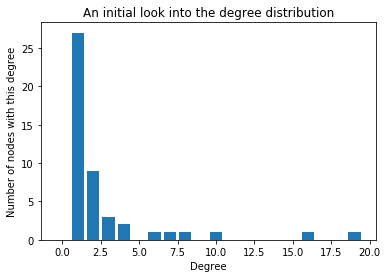

In [97]:
# Degree histogram of the network
degree_hist = nx.degree_histogram(country_graph)
xticks = range(len(degree_hist))
plt.bar(xticks, degree_hist, align='center')
plt.xlabel('Degree')
plt.ylabel('Number of nodes with this degree')
plt.title('An initial look into the degree distribution');

In [98]:
# Network density
nx.density(country_graph)

0.05920444033302498

In [99]:
# There is a single component in this graph (in others, there can be many components)
for i, component in enumerate(nx.connected_components(country_graph)):
    print("COMPONENT {:d}:".format(i), component)

COMPONENT 0: {'Morocco', 'Lebanon', 'Syria', 'Iceland', 'Kuwait', 'Thailand', 'Sudan', 'Canada', 'Turkey', 'Denmark', 'Israel', 'Georgia', 'United\nArab\nEmirates', 'Czechoslovakia', 'Afghanistan', 'United\nKingdom', 'Iraq', 'China', 'Qatar', 'Yugoslavia', 'Romania', 'Pakistan', 'North\nKorea', 'Portugal', 'Iran', 'United\nStates\nof\nAmerica', 'Jordan', 'German\nFederal\nRepublic', 'Republic\nof\nVietnam', 'Libya', 'Saudi\nArabia', 'India', 'Cambodia', 'Finland', 'Russia', 'France', 'Ukraine', 'Norway', 'Poland', 'Bahrain', 'Azerbaijan', 'Germany', 'Egypt', 'Oman', 'Spain', 'Hungary', 'Tunisia'}


In [100]:
# What are the degrees of France's neighbors? 
for neighbor in nx.all_neighbors(country_graph, 'United\nKingdom'):
    print(neighbor)
    degree = nx.degree(country_graph, neighbor)
    print('- degree: {:d}'.format(degree))
    print('------------')

Russia
- degree: 19
------------
Iran
- degree: 6
------------
Egypt
- degree: 7
------------
Israel
- degree: 3
------------
Iceland
- degree: 2
------------
Iraq
- degree: 16
------------
Denmark
- degree: 3
------------
China
- degree: 8
------------
Portugal
- degree: 2
------------
Spain
- degree: 3
------------


In [101]:
# Let's focus on other centrality values of these nodes

# Closeness: Inverse of the average length of all shortest paths from this node to all other nodes
# (closer to 1 = more central)
nx.closeness_centrality(country_graph)

{'United\nKingdom': 0.5609756097560976,
 'Russia': 0.5227272727272727,
 'Iran': 0.4946236559139785,
 'China': 0.45544554455445546,
 'Egypt': 0.4339622641509434,
 'Jordan': 0.3357664233576642,
 'France': 0.3511450381679389,
 'Iraq': 0.4791666666666667,
 'Yugoslavia': 0.3458646616541353,
 'Finland': 0.3458646616541353,
 'Poland': 0.3458646616541353,
 'Israel': 0.38333333333333336,
 'Hungary': 0.3458646616541353,
 'Syria': 0.3262411347517731,
 'Iceland': 0.368,
 'United\nStates\nof\nAmerica': 0.46,
 'Turkey': 0.42990654205607476,
 'Sudan': 0.3357664233576642,
 'Saudi\nArabia': 0.3357664233576642,
 'Kuwait': 0.3262411347517731,
 'Tunisia': 0.3262411347517731,
 'Denmark': 0.37398373983739835,
 'Thailand': 0.35658914728682173,
 'India': 0.3150684931506849,
 'Republic\nof\nVietnam': 0.35658914728682173,
 'Portugal': 0.368,
 'Czechoslovakia': 0.3458646616541353,
 'Cambodia': 0.3150684931506849,
 'Romania': 0.3458646616541353,
 'German\nFederal\nRepublic': 0.27058823529411763,
 'Libya': 0.30463

In [102]:
# Betweenness: Consider the shortest paths between each pair of nodes.
# What fraction of all these paths are going through this node?
nx.betweenness_centrality(country_graph)

{'United\nKingdom': 0.3876865968170317,
 'Russia': 0.48851789112658667,
 'Iran': 0.12541418324027018,
 'China': 0.1479871175523349,
 'Egypt': 0.08416881025576677,
 'Jordan': 0.0,
 'France': 0.004428341384863125,
 'Iraq': 0.4032385971516406,
 'Yugoslavia': 0.0,
 'Finland': 0.0,
 'Poland': 0.0,
 'Israel': 0.043478260869565216,
 'Hungary': 0.0,
 'Syria': 0.0,
 'Iceland': 0.043478260869565216,
 'United\nStates\nof\nAmerica': 0.06631595457682414,
 'Turkey': 0.03757199322416713,
 'Sudan': 0.0,
 'Saudi\nArabia': 0.0,
 'Kuwait': 0.0,
 'Tunisia': 0.0,
 'Denmark': 0.046938327373109975,
 'Thailand': 0.0,
 'India': 0.0,
 'Republic\nof\nVietnam': 0.0,
 'Portugal': 0.0034600665035447653,
 'Czechoslovakia': 0.0,
 'Cambodia': 0.0,
 'Romania': 0.0,
 'German\nFederal\nRepublic': 0.0,
 'Libya': 0.0,
 'Canada': 0.027713365539452504,
 'Norway': 0.0,
 'Lebanon': 0.0,
 'Spain': 0.0113413639500596,
 'Bahrain': 0.0,
 'United\nArab\nEmirates': 0.0,
 'Morocco': 0.0,
 'Qatar': 0.0,
 'Oman': 0.0,
 'Georgia': 0.0,


In [103]:
# Eigencentrality: like Google's PageRank: a measure of information flow
nx.eigenvector_centrality(country_graph)

{'United\nKingdom': 0.3616622196266445,
 'Russia': 0.463259629093357,
 'Iran': 0.2728838856814168,
 'China': 0.260695576436045,
 'Egypt': 0.21024916832695484,
 'Jordan': 0.10295785373805291,
 'France': 0.10133498195814805,
 'Iraq': 0.3682255830371681,
 'Yugoslavia': 0.08244970596927452,
 'Finland': 0.08244970596927452,
 'Poland': 0.08244970596927452,
 'Israel': 0.10511881398271783,
 'Hungary': 0.08244970596927452,
 'Syria': 0.06553731228661874,
 'Iceland': 0.06647407403884818,
 'United\nStates\nof\nAmerica': 0.2429526161641922,
 'Turkey': 0.14798701825589328,
 'Sudan': 0.10295785373805291,
 'Saudi\nArabia': 0.10295785373805291,
 'Kuwait': 0.06553731228661874,
 'Tunisia': 0.06553731228661874,
 'Denmark': 0.09095587823134653,
 'Thailand': 0.12884765504327603,
 'India': 0.0463979490740015,
 'Republic\nof\nVietnam': 0.12884765504327603,
 'Portugal': 0.08807472394092729,
 'Czechoslovakia': 0.08244970596927452,
 'Cambodia': 0.0463979490740015,
 'Romania': 0.08244970596927452,
 'German\nFeder

In [104]:
# (in case there are multiple paths of this same shortest length between these two)
for i, path in enumerate(nx.all_shortest_paths(country_graph, 'Jordan', 'Ecuador')):
    print("Shortest Path {}:".format(i), path)

NetworkXNoPath: Target Ecuador cannot be reachedfrom Source Jordan

In [108]:
nx.average_shortest_path_length(country_graph)

2.839962997224792

In [109]:
# Find the Communities with python-louvain
modules = community.best_partition(country_graph)
modules

{'United\nKingdom': 0,
 'Russia': 1,
 'Iran': 2,
 'China': 3,
 'Egypt': 4,
 'Jordan': 4,
 'France': 0,
 'Iraq': 4,
 'Yugoslavia': 1,
 'Finland': 1,
 'Poland': 1,
 'Israel': 0,
 'Hungary': 1,
 'Syria': 4,
 'Iceland': 0,
 'United\nStates\nof\nAmerica': 2,
 'Turkey': 4,
 'Sudan': 4,
 'Saudi\nArabia': 4,
 'Kuwait': 4,
 'Tunisia': 4,
 'Denmark': 0,
 'Thailand': 3,
 'India': 3,
 'Republic\nof\nVietnam': 3,
 'Portugal': 0,
 'Czechoslovakia': 1,
 'Cambodia': 3,
 'Romania': 1,
 'German\nFederal\nRepublic': 0,
 'Libya': 4,
 'Canada': 0,
 'Norway': 0,
 'Lebanon': 0,
 'Spain': 0,
 'Bahrain': 4,
 'United\nArab\nEmirates': 4,
 'Morocco': 4,
 'Qatar': 4,
 'Oman': 4,
 'Georgia': 1,
 'Azerbaijan': 1,
 'North\nKorea': 3,
 'Ukraine': 1,
 'Germany': 1,
 'Afghanistan': 2,
 'Pakistan': 2}

In [110]:
# How many modules do we have?
module_ids = set(modules.values())
num_modules = len(module_ids)
num_modules

5

In [111]:
# It would be nice to look up a module and
# see which nodes its members are
from collections import defaultdict
module_to_nodes = defaultdict(list)
for node, module_id in modules.items():
    module_to_nodes[module_id].append(node)

module_to_nodes

defaultdict(list,
            {0: ['United\nKingdom',
              'France',
              'Israel',
              'Iceland',
              'Denmark',
              'Portugal',
              'German\nFederal\nRepublic',
              'Canada',
              'Norway',
              'Lebanon',
              'Spain'],
             1: ['Russia',
              'Yugoslavia',
              'Finland',
              'Poland',
              'Hungary',
              'Czechoslovakia',
              'Romania',
              'Georgia',
              'Azerbaijan',
              'Ukraine',
              'Germany'],
             2: ['Iran',
              'United\nStates\nof\nAmerica',
              'Afghanistan',
              'Pakistan'],
             3: ['China',
              'Thailand',
              'India',
              'Republic\nof\nVietnam',
              'Cambodia',
              'North\nKorea'],
             4: ['Egypt',
              'Jordan',
              'Iraq',
              'Syria',


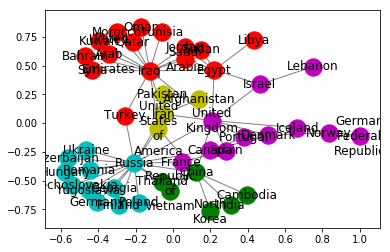

In [112]:
# Let's visualize the modules

# Use the same layout as before
positions = nx.spring_layout(country_graph)

# But now, instead of drawing it all at once, draw
# nodes module by module, using a different color
# for each module
colors = ['m', 'c', 'y', 'g', 'r', 'b']
for i, module in enumerate(module_ids):
    nodes_in_this_module = module_to_nodes[module]
    module_color = colors[i % len(colors)]
    nx.draw_networkx_nodes(country_graph,
                           positions,
                           nodes_in_this_module,
                           node_color = module_color)
    
# draw the edges and labels as well and voila
nx.draw_networkx_edges(country_graph, positions, alpha=0.5)
labels = nx.draw_networkx_labels(country_graph, pos = positions)